
## Stroke Prediction Dataset
### 11 clinical features for predicting stroke events

In [2]:
# importing the needed df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
sns.set_theme(style="whitegrid")
from dython.model_utils import metric_graph
import os
from dython.nominal import associations

In [5]:
dataset = pd.read_csv(r"C:\Users\godwi\Data_Science_ML\Stroke-Prediction-Model\stroke-data.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [1]:
dataset.shape

NameError: name 'dataset' is not defined

In [3]:
dataset[dataset.duplicated(subset= ["gender","age","hypertension","heart_disease","ever_married","work_type",\
    "Residence_type","avg_glucose_level","bmi","smoking_status","stroke"],keep="first")]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [4]:
dataset.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
dataset.bmi.mean()

28.893236911794666

In [6]:
dataset.bmi.fillna(dataset.bmi.mean(), inplace = True)

In [7]:
dataset.bmi.fillna(dataset.bmi.mean(), inplace = True)

In [8]:
dataset.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
# drop smoking status is null
dataset.smoking_status.fillna(np.nan, inplace = True)

In [10]:
dataset.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
dataset.dropna(how = "any", inplace = True)

In [12]:
dataset.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
shell = dataset.copy()
shell.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [14]:
age_hyper =  dataset.loc[:,["age","gender"]]
age_hyper

,age,gender
0,67.0,Male
1,61.0,Female
2,80.0,Male
3,49.0,Female
4,79.0,Female
...,...,...
5105,80.0,Female
5106,81.0,Female
5107,35.0,Female
5108,51.0,Male


In [15]:
age_hyper['age_cat'] = age_hyper.age.apply(lambda x :  "0-2" if 0 <= x<2 else
                                            "2-5" if 2<= x<= 5 else
                                            "6-13" if 5< x< 13 else
                                            "13-18" if 13<= x< 18 else
                                            "18-30" if 18<= x< 30 else
                                            "30-40" if 30<= x< 40 else
                                            "40-50" if 40<= x< 50 else
                                            "50-65" if 50<= x< 65 else
                                            "65+" if x>= 65 else "not known"
                                )

In [16]:
pivot_age = age_hyper.pivot_table(index = 'age_cat', columns='gender', values="age", aggfunc= 'count')
pivot_age

gender,Female,Male,Other
age_cat,,,
0-2,57.0,63.0,NaN
13-18,144.0,124.0,NaN
18-30,436.0,222.0,1.0
2-5,98.0,102.0,NaN
30-40,417.0,238.0,NaN
40-50,450.0,280.0,NaN
50-65,663.0,520.0,NaN
6-13,119.0,149.0,NaN
65+,610.0,417.0,NaN


<AxesSubplot:xlabel='age_cat'>

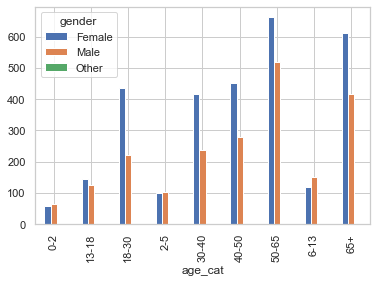

In [17]:
pivot_age.plot(kind = 'bar')

In [18]:
gender_stat =   dataset.gender.value_counts().to_frame()
gender_stat

,gender
Female,2994
Male,2115
Other,1


<AxesSubplot:ylabel='gender'>

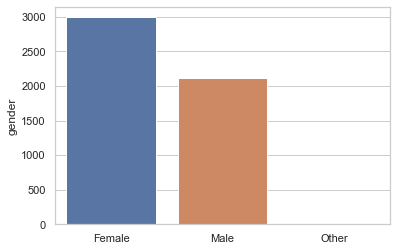

In [19]:

sns.barplot(data = gender_stat, x = gender_stat.index, y = gender_stat['gender'] )

In [20]:
dataset.to_csv("master_df.csv", index = False)

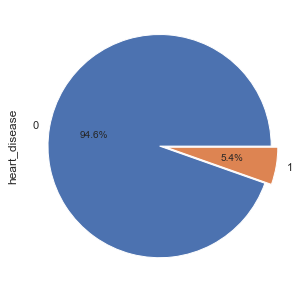

In [21]:
dataset.heart_disease.value_counts().plot(kind= "pie", autopct = "%.1f%%", figsize = (5,10), explode = (0.01,0.05));

In [22]:
#  Ssmoking with heart diseas
married_stroke = dataset.loc[:,["ever_married","stroke"]].groupby("ever_married").count()
married_stroke

,stroke
ever_married,
No,1757
Yes,3353


<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

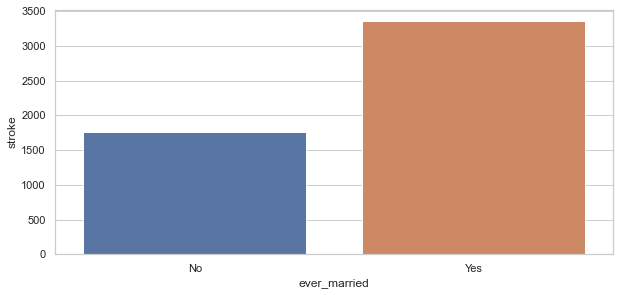

In [23]:
fig,(ax1) = plt.subplots(figsize = (10,4.5))
sns.barplot(data = married_stroke, y = "stroke", x = married_stroke.index, ax= ax1)

<AxesSubplot:xlabel='bmi', ylabel='age'>

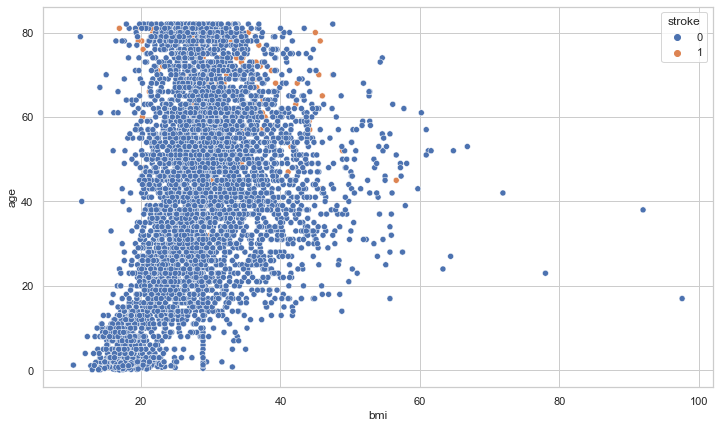

In [24]:
fig, ax = plt.subplots( figsize = (12,7))
sns.scatterplot( data = dataset, x  = dataset.bmi,  y =dataset.age, hue = 'stroke', ax = ax , palette = "deep")

<AxesSubplot:>

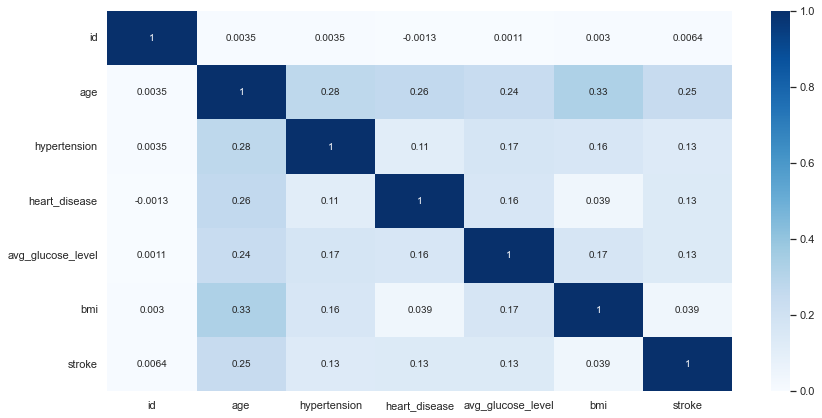

In [25]:
# feature correlation
fig,ax =plt.subplots(figsize = (14,7))
feature_check =sns.heatmap( dataset.corr(), cmap = "Blues", annot = True)
feature_check

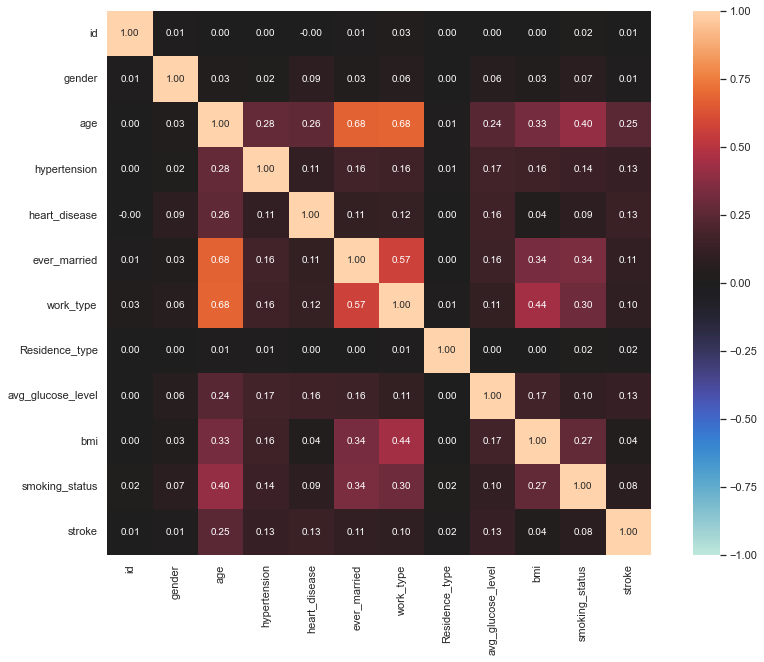

{'corr':                          id    gender       age  hypertension  heart_disease  \
 id                 1.000000  0.013127  0.003538      0.003550      -0.001296   
 gender             0.013127  1.000000  0.029727      0.021715       0.085749   
 age                0.003538  0.029727  1.000000      0.276398       0.263796   
 hypertension       0.003550  0.021715  0.276398      1.000000       0.108306   
 heart_disease     -0.001296  0.085749  0.263796      0.108306       1.000000   
 ever_married       0.013690  0.029870  0.679125      0.164243       0.114644   
 work_type          0.027792  0.058593  0.682044      0.162659       0.117627   
 Residence_type     0.001403  0.000000  0.014180      0.007913       0.003092   
 avg_glucose_level  0.001092  0.055912  0.238171      0.174474       0.161857   
 bmi                0.002999  0.028193  0.325942      0.160189       0.038899   
 smoking_status     0.019797  0.070888  0.399650      0.142575       0.093483   
 stroke             

In [26]:
associations(dataset, figsize = (15,10))

In [27]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Grouping by numerica and categorical columns and alsoe Split the dataset to X and y

In [28]:
# lets get the categorical and numeric columns
categorical_col = list(dataset.select_dtypes("object").drop(['Residence_type'],axis =1).columns)

In [29]:
numerical_col = list(dataset.select_dtypes(exclude="object").drop(['id',"stroke"],axis =1).columns)
numerical_col

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [30]:
X= dataset[categorical_col + numerical_col]
X.head()

,gender,ever_married,work_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
0,Male,Yes,Private,formerly smoked,67.0,0,1,228.69,36.600000
1,Female,Yes,Self-employed,never smoked,61.0,0,0,202.21,28.893237
2,Male,Yes,Private,never smoked,80.0,0,1,105.92,32.500000
3,Female,Yes,Private,smokes,49.0,0,0,171.23,34.400000
4,Female,Yes,Self-employed,never smoked,79.0,1,0,174.12,24.000000


In [31]:
y =dataset["stroke"]

## Preprocessing , change strings to numeric with OneHotEncoder

In [32]:
cat_pipeline = Pipeline(steps =[
                 ("ohe", OneHotEncoder(handle_unknown = "ignore")),
])

num_pipeline = Pipeline(steps = [
                ("scaler", StandardScaler()),
])

In [33]:
# To Create ColumnTransformer to apply pipeline for each column set
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer([
    ("num_pipeline", num_pipeline,numerical_col),
    ("cat_pipeline",cat_pipeline,categorical_col)],
    remainder='drop'
    )

In [34]:
# Final pipeline to add a model or estimator
model = imbPipeline([
    ("transformer", transformer),
    ("smote", SMOTE(random_state = 42)),
    ("RFC",RandomForestClassifier(n_estimators=1000, n_jobs = 1, random_state = 42))
    ])

In [35]:
# training test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 30, stratify = y,random_state= 42)

In [36]:
model.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'smoking_status'])])),
                ('smote', SMOTE(random_state=42)),
                ('RFC',
                 RandomForestClassifier(n_estimators=1000, n_jobs=1,
                                        random_state=42))])

In [37]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
print(f" Accuracy Score is {accuracy_score(y_test, y_pred)*100:.2f}%")

 Accuracy Score is 93.33%


In [40]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[28,  1],
       [ 1,  0]], dtype=int64)

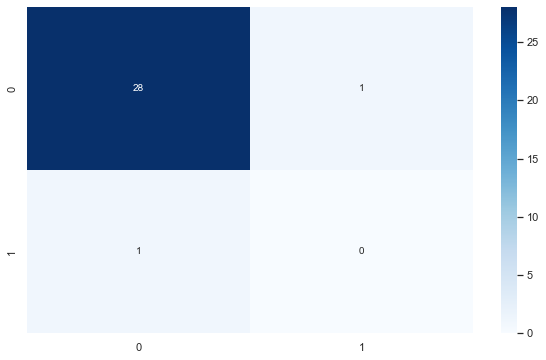

In [41]:
fig, ax = plt.subplots(figsize = (10,6))
cm_plot = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = "Blues", fmt = "g")

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.00      0.00      0.00         1

    accuracy                           0.93        30
   macro avg       0.48      0.48      0.48        30
weighted avg       0.93      0.93      0.93        30



# Saving model

In [43]:
# import joblib
# joblib.dump(model, "model_stroke.joblib")

['model_stroke.joblib']